# THE TOPIC OF DEBATES IN SOCIAL MEDIA

## Import of libraries

In [1]:
import warnings
import pandas as pd
import gensim
import pickle
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

## Import of the selected model from the debates

In [2]:
# load model
model = gensim.models.LdaModel.load('G_candidat_noun.model')
id2word = model.id2word.load('id2word_best_model.i2')
corpus_file = 'corpus_best_model.pkl'

infile = open(corpus_file, 'rb')
corpus = pickle.load(infile)
infile.close()

infile = open('stop_words.pkl', 'rb')
stop_words = pickle.load(infile)
infile.close()

stop_words.extend(['donald'])

In [3]:
# length of stop_words
len(stop_words)

540

In [4]:
# model set
pyLDAvis.enable_notebook()
vis_opt = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
vis_opt

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.030291  0.018936       1        1  18.960599
2      0.109440 -0.062145       2        1  16.760915
6      0.047089 -0.091834       3        1  16.534610
4      0.024501  0.125604       4        1  16.337115
1     -0.136215 -0.064473       5        1  11.483754
5     -0.002656  0.057989       6        1  10.808060
0     -0.072451  0.015923       7        1   9.114947, topic_info=        Term       Freq      Total Category  logprob  loglift
109      job  37.000000  37.000000  Default  30.0000  30.0000
81      plan  28.000000  28.000000  Default  29.0000  29.0000
45    ballot  28.000000  28.000000  Default  28.0000  28.0000
213   dollar  24.000000  24.000000  Default  27.0000  27.0000
10   problem  25.000000  25.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
19    person   2.246362  18.162113   Topic7  -4.6556   0.3052
29      care   1.887233  13.724392   Topic7  -4.8298   0.4112
104    world   1.491441  12.908194   Topic7  -5.0652   0.2371
224      law   1.491415   9.139536   Topic7  -5.0652   0.5824
58    family   1.491392  22.781535   Topic7  -5.0652  -0.3310

[452 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
546       2  0.903337     abuse
715       7  0.465089    access
397       7  0.691785      acre
96        5  0.277771  addition
96        6  0.277771  addition
...     ...       ...       ...
104       6  0.077470     world
104       7  0.077470     world
513       2  0.605954     worry
513       5  0.151489     worry
513       6  0.151489     worry

[712 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 7, 5, 2, 6, 1])

In [5]:
# topics of model
model.print_topics(num_words = 30)

[(0,
  '0.033*"job" + 0.017*"plan" + 0.015*"ballot" + 0.013*"money" + 0.012*"tax" + 0.012*"forest" + 0.012*"election" + 0.011*"court" + 0.010*"person" + 0.009*"emission" + 0.009*"office" + 0.008*"care" + 0.007*"parent" + 0.007*"program" + 0.007*"group" + 0.007*"woman" + 0.006*"world" + 0.006*"law" + 0.006*"family" + 0.006*"extent" + 0.006*"governor" + 0.006*"city" + 0.006*"gas" + 0.006*"carbon" + 0.006*"transition" + 0.006*"addition" + 0.006*"management" + 0.006*"capture" + 0.006*"credit" + 0.006*"labor"'),
 (1,
  '0.018*"business" + 0.015*"vote" + 0.013*"plant" + 0.012*"person" + 0.012*"police" + 0.011*"oil" + 0.010*"tree" + 0.010*"list" + 0.008*"matter" + 0.008*"superpredator" + 0.008*"air" + 0.008*"death" + 0.008*"use" + 0.008*"responsibility" + 0.008*"sanction" + 0.008*"town" + 0.006*"rate" + 0.006*"state" + 0.006*"court" + 0.006*"order" + 0.006*"world" + 0.006*"country" + 0.005*"building" + 0.005*"fire" + 0.005*"word" + 0.005*"gas" + 0.005*"wife" + 0.005*"forest" + 0.005*"coal" + 

In [6]:
topics = ['1. Social inequalities', '2. Energy', '3. Counteracting COVID-19' ,'4. Healthcare', '5. Climate changes', '6. Law enforcement', '7. Undefined topics']

## Assignment to the topic of debates

In [7]:
def assign_to_topic(model, text):
    '''This function assign text to topic'''
    doc = text.split()
    doc_vector = model.id2word.doc2bow(doc)
    doc_topics = model[doc_vector]
    df = pd.DataFrame(doc_topics, columns = ['Topic', 'Probab']).sort_values(by = 'Probab', ascending = False).reset_index()
    topic, probab = df.loc[0, 'Topic'], df.loc[0, 'Probab'] 
    return [topic, probab]

In [8]:
topic = lambda x: assign_to_topic(model, x)[0]
prob = lambda x: round(assign_to_topic(model, x)[1], 3)

In [9]:
# create dataframe of topics
df_topic = pd.DataFrame(columns={0, 1, 2, 3, 4, 5, 6})

## Debates

In [10]:
# load debates
debates = pd.read_pickle('Dominujacy_temat_df.pkl')

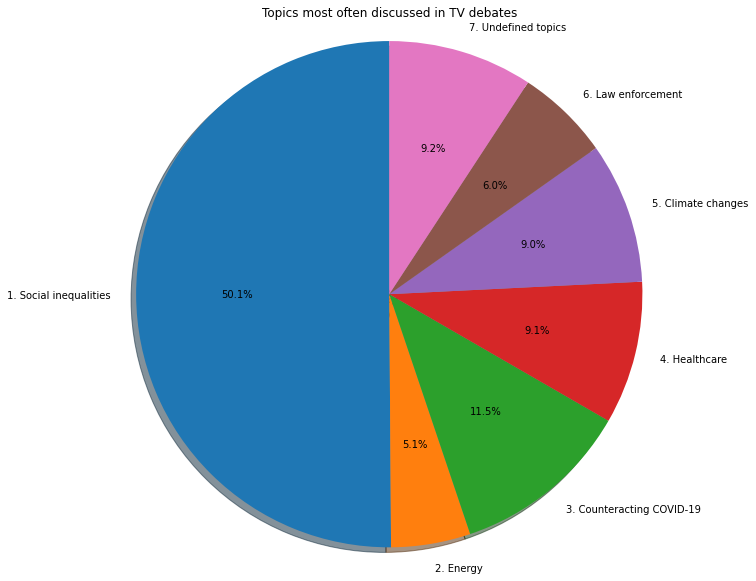

In [11]:
fig, (ax1) = plt.subplots(figsize = (10, 10))
fig.set_facecolor("w")

labels = pd.DataFrame(debates.Dominant_Topic.value_counts()).index.sort_values()
sizes = pd.DataFrame(debates.Dominant_Topic.value_counts())['Dominant_Topic'].sort_index()

ax1.pie(sizes, labels = topics, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Topics most often discussed in TV debates');

## Topics most often discussed in YT comments

In [12]:
yt = pd.read_pickle('../YouTube/YT_po_lematyzacji.pkl')

In [13]:
# add comment to topic
yt['topic'] = yt.correct.apply(topic)
yt['topic_prob'] = yt.correct.apply(prob)

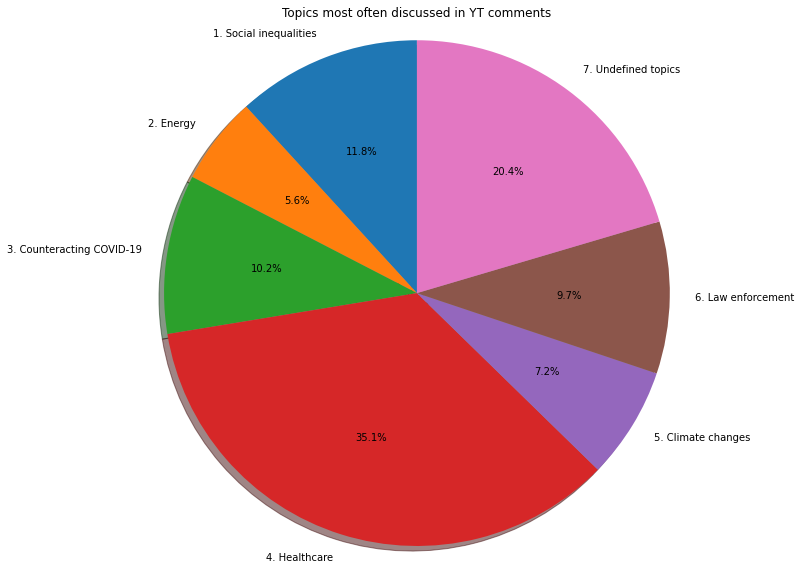

In [14]:
fig, (ax1) = plt.subplots(figsize = (10, 10))
fig.set_facecolor("w")

labels = pd.DataFrame(yt.topic.value_counts()).index.sort_values()
sizes = pd.DataFrame(yt.topic.value_counts())['topic'].sort_index()

ax1.pie(sizes, labels = topics, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Topics most often discussed in YT comments');

## Topics most often discussed in Tweeter comments

In [15]:
# preparing for topics
#tweetUSA = pd.read_pickle('../Tweety/data/ang_local_USA_df.pkl')
# tweetUSA['topic'] = tweetUSA.edited_tweet.apply(topic)
# tweetUSA['topic_prob'] = tweetUSA.edited_tweet.apply(prob)
# tweetUSA.to_pickle('DF_Tweeter_topic.pkl')

In [16]:
# loading prepared data tweets from USA
tweetUSA = pd.read_pickle('DF_Tweeter_topic.pkl')

In [17]:
# preparing tweets from Asia, Europe and unknown location
# tweetNA = pd.read_pickle('../Tweety/data/ang_local_NA_df.pkl')
# tweetEU = pd.read_pickle('../Tweety/data/ang_local_EU_df.pkl')
# tweetAsia = pd.read_pickle('../Tweety/data/ang_local_Asia_df.pkl')

In [18]:
# tweetNA['topic'] = tweetNA.edited_tweet.apply(topic)
# tweetNA['topic_prob'] = tweetNA.edited_tweet.apply(prob)

# tweetEU['topic'] = tweetEU.edited_tweet.apply(topic)
# tweetEU['topic_prob'] = tweetEU.edited_tweet.apply(prob)

# tweetAsia['topic'] = tweetAsia.edited_tweet.apply(topic)
# tweetAsia['topic_prob'] = tweetAsia.edited_tweet.apply(prob)

In [19]:
# tweetNA.to_pickle('DF_Tweeter_topic_NA.pkl')
# tweetEU.to_pickle('DF_Tweeter_topic_EU.pkl')
# tweetAsia.to_pickle('DF_Tweeter_topic_Asia.pkl')

In [20]:
tweetNA = pd.read_pickle('DF_Tweeter_topic_NA.pkl')
tweetEU = pd.read_pickle('DF_Tweeter_topic_EU.pkl')
tweetAsia = pd.read_pickle('DF_Tweeter_topic_Asia.pkl')

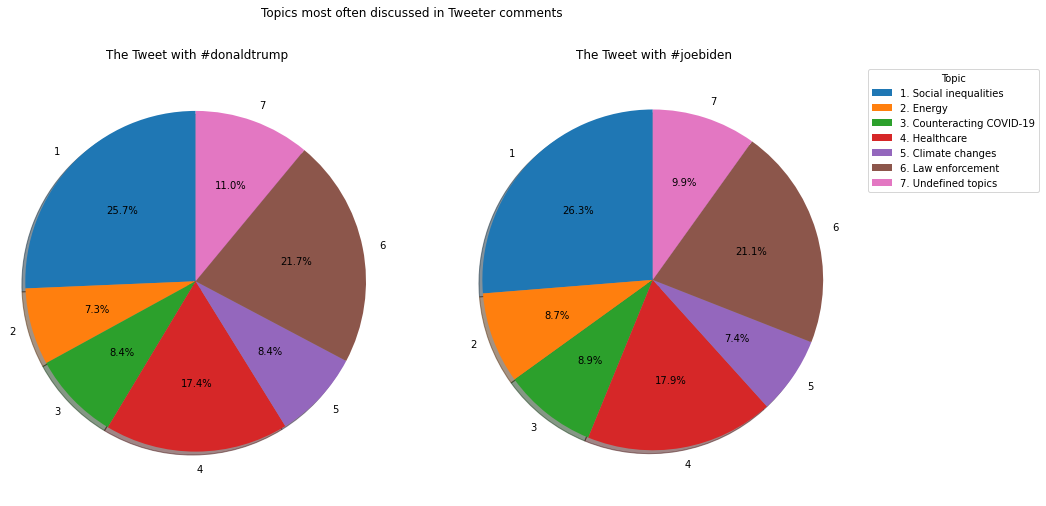

In [21]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15, 8))
fig.set_facecolor("w")

fig.suptitle('Topics most often discussed in Tweeter comments')
pie_colors = ['grey', 'blue', 'red', 'orange', 'green', 'yellow', 'violet']

labels = pd.DataFrame(tweetUSA[tweetUSA.hash == 'donaldtrump'].topic.value_counts()).index.sort_values()
sizes = pd.DataFrame(tweetUSA[tweetUSA.hash == 'donaldtrump'].topic.value_counts())['topic'].sort_index()
explode = (0, 0, 0, 0, 0, 0, 0)

ax1.pie(sizes, explode = explode, labels = labels+1, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('The Tweet with #donaldtrump')

labels = pd.DataFrame(tweetUSA[tweetUSA.hash == 'joebiden'].topic.value_counts()).index.sort_values()
sizes = pd.DataFrame(tweetUSA[tweetUSA.hash == 'joebiden'].topic.value_counts())['topic'].sort_index()
explode = (0, 0, 0, 0, 0, 0, 0)
ax2.pie(sizes, explode = explode, labels = labels+1, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax2.axis('equal')
ax2.set_title('The Tweet with #joebiden')
plt.legend(labels = topics, title = 'Topic', bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

## Topics most often discussed in Facebook posts

In [22]:
# fb_trump = pd.read_pickle('facebook_trump.pkl')
# fb_biden = pd.read_pickle('facebook_biden.pkl')

In [23]:
# fb_biden['topic'] = fb_biden.lemat.apply(lambda x: topic(' '.join(x)))
# fb_biden['topic_prob'] = fb_biden.lemat.apply(lambda x: prob(' '.join(x)))

In [24]:
# fb_trump['topic'] = fb_trump.lemat.apply(lambda x: topic(' '.join(x)))
# fb_trump['topic_prob'] = fb_trump.lemat.apply(lambda x: prob(' '.join(x)))

In [25]:
# fb_biden.to_pickle('DF_FB_topic_Biden.pkl')
# fb_trump.to_pickle('DF_FB_topic_Trump.pkl')

In [26]:
fb_trump = pd.read_pickle('DF_FB_topic_Trump.pkl')
fb_biden = pd.read_pickle('DF_FB_topic_Biden.pkl')

#### Share of specific topics in FB posts

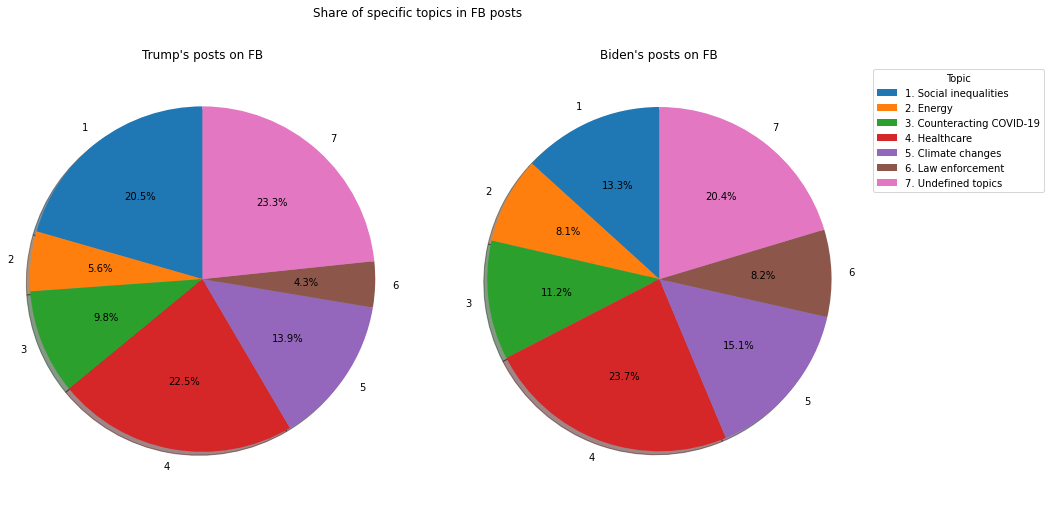

In [27]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15, 8))
fig.set_facecolor("w")

fig.suptitle('Share of specific topics in FB posts')

pie_colors = ['grey', 'blue', 'red', 'orange', 'green', 'yellow', 'violet']

labels = pd.DataFrame(fb_trump.topic.value_counts()).index.sort_values()
sizes = pd.DataFrame(fb_trump.topic.value_counts())['topic'].sort_index()
explode = (0, 0, 0, 0, 0, 0, 0)

ax1.pie(sizes, explode = explode, labels = labels+1, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title("Trump's posts on FB")

labels = pd.DataFrame(fb_biden.topic.value_counts()).index.sort_values()
sizes = pd.DataFrame(fb_biden.topic.value_counts())['topic'].sort_index()
explode = (0, 0, 0, 0, 0, 0, 0)
ax2.pie(sizes, explode = explode, labels = labels+1, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax2.axis('equal')
ax2.set_title("Biden's posts on FB")

plt.legend(labels = topics, title = 'Topic', bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

### Generate a cumulative dataframe

In [28]:
for i in df_topic.columns:
    df_topic.loc['debates',i] = debates.Dominant_Topic.value_counts()[i]
    df_topic.loc['youtube',i] = yt.topic.value_counts()[i]
    df_topic.loc['facebook_Biden',i] = fb_biden.topic.value_counts()[i]
    df_topic.loc['facebook_Trump',i] = fb_trump.topic.value_counts()[i]
    df_topic.loc['tweeter_USA',i] = tweetUSA.topic.value_counts()[i]
    df_topic.loc['tweeter_NA',i] = tweetNA.topic.value_counts()[i]
    df_topic.loc['tweeter_EU',i] = tweetEU.topic.value_counts()[i]
    df_topic.loc['tweeter_Asia',i] = tweetAsia.topic.value_counts()[i]

In [29]:
df_topic.sum(axis = 1)

debates             888.0
youtube            3407.0
facebook_Biden     1710.0
facebook_Trump     1538.0
tweeter_USA       35509.0
tweeter_NA        62433.0
tweeter_EU        11036.0
tweeter_Asia      11675.0
dtype: float64

In [30]:
df_topic

,0,1,2,3,4,5,6
debates,445,45,102,81,80,53,82
youtube,402,191,347,1196,244,331,696
facebook_Biden,227,139,191,406,259,140,348
facebook_Trump,316,86,151,346,214,66,359
tweeter_USA,9209,2807,3057,6259,2827,7614,3736
tweeter_NA,19588,4518,4833,10034,5131,11694,6635
tweeter_EU,3507,792,824,1577,1057,2025,1254
tweeter_Asia,4133,706,836,1694,1050,2174,1082


In [31]:
df_perc = df_topic[df_topic.columns].div(df_topic.sum(axis = 1), 0)*100

In [32]:
df_perc.reset_index(inplace = True)
df_perc.rename(columns = {'index':'name'}, inplace = True)

In [33]:
df_perc

,name,0,1,2,3,4,5,6
0,debates,50.112613,5.067568,11.486486,9.121622,9.009009,5.968468,9.234234
1,youtube,11.799237,5.606105,10.184913,35.104197,7.161726,9.715292,20.428529
2,facebook_Biden,13.274854,8.128655,11.169591,23.74269,15.146199,8.187135,20.350877
3,facebook_Trump,20.546164,5.591678,9.817945,22.496749,13.914174,4.291287,23.342003
4,tweeter_USA,25.93427,7.905038,8.609085,17.626517,7.961362,21.442451,10.521276
5,tweeter_NA,31.374433,7.236558,7.741098,16.071629,8.21841,18.730479,10.627393
6,tweeter_EU,31.777818,7.176513,7.466473,14.289598,9.577746,18.34904,11.362813
7,tweeter_Asia,35.400428,6.047109,7.1606,14.509636,8.993576,18.620985,9.267666


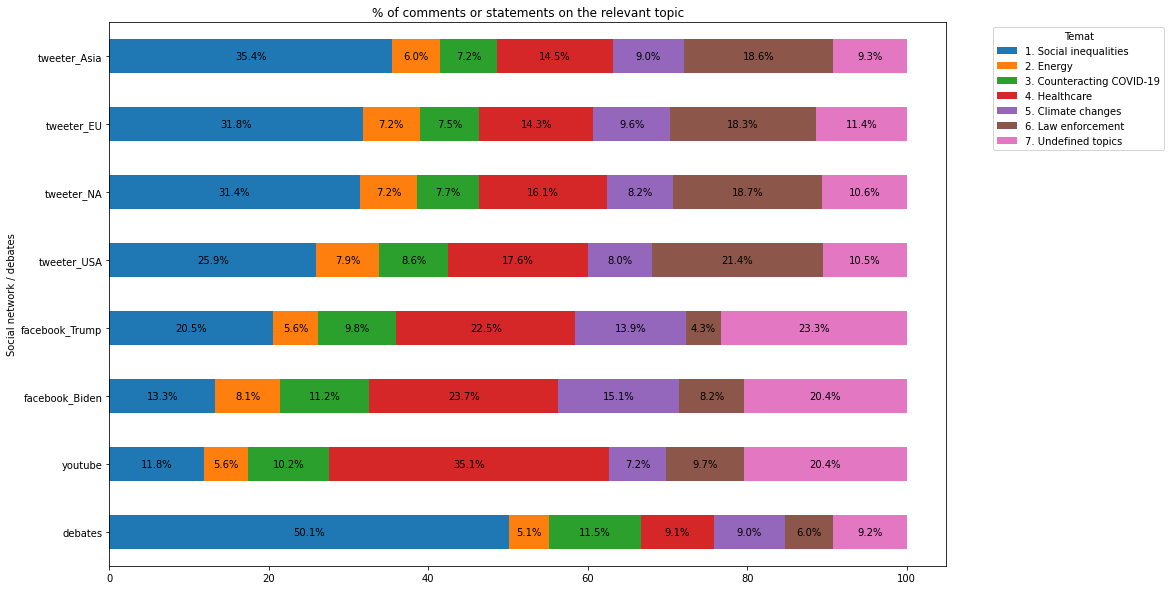

In [34]:
df_perc.plot(
        x = 'name', 
        kind = 'barh', 
        stacked = True, 
        title = '% of comments or statements on the relevant topic', 
        mark_right = True,
        xlabel = 'Social network / debates',
        figsize = (15, 10))

for n in df_perc[df_perc.columns[1:]]:
    for i, (a, b, c) in enumerate(zip(df_perc.iloc[:, 1:].cumsum(1)[n], df_perc[n], df_perc[df_perc.columns[1:]][n])):
        plt.text(a-b/2, i, str(round(c, 1)) + '%', va = 'center', ha = 'center')

plt.legend(labels = topics, title = 'Temat', bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()